### WASP33 DATA

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pathlib import Path
import numpy as np
from astropy.time import Time
from astropy.io import fits
import astropy.units as u

In [2]:
FILE_FRAMES = {'tcorr': '{}_pp_e2dsff_tcorr_AB.fits',
               'recon': '{}_pp_e2dsff_recon_AB.fits',
               'pclean': '{}_pp_tellu_pclean_AB.fits'}

In [3]:
# Set the directory path
"""
base_dir = Path.home() / Path('projects/def-dlafre/adb/')

if base_dir is None:
    try:
        base_dir = os.environ['SCRATCH']
    except KeyError:
        base_dir = Path.home()

obs_dir = base_dir / Path('Observations/SPIRou/v07275/WASP33/')
"""
obs_dir = Path.home() / Path('projects/def-dlafre/adb/Observations/SPIRou/v07275/WASP33/') # Antoine SPIRou data directory

Filename: /home/ldang05/projects/def-dlafre/adb/Observations/SPIRou/v07275/WASP33/2446828o_pp_e2dsff_AB.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1018   ()      
  1  EXT_E2DS_FF    1 ImageHDU         8   (4088, 49)   float64   
  2  ORDER_TABLE    1 BinTableHDU     85   49R x 38C   [K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  3  PARAM_TABLE    1 BinTableHDU     21   1412R x 6C   [39A, 9A, 402A, 96A, 363A, 3A]   


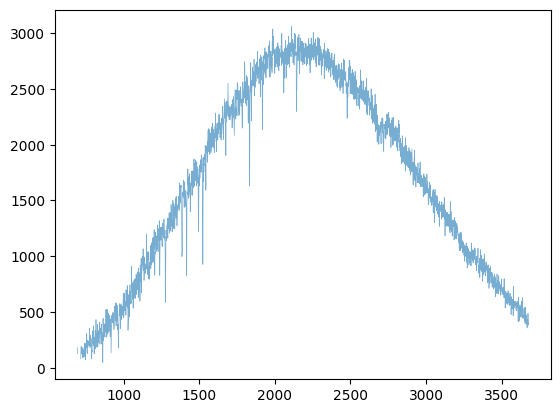

In [7]:
# Check fits file information
p = '/home/ldang05/projects/def-dlafre/adb/Observations/SPIRou/v07275/WASP33/2446828o_pp_e2dsff_AB.fits'
with fits.open(p) as hdu:
    hdu.info()
    header0 = hdu[0].header
    d=hdu[1].data[1]
    # print(header0['filename'])
    # print(header0['BJD'])
plt.plot(d,linewidth=0.5,alpha=0.6);

In [37]:
# CLEAN FILES ACCORDING TO RECONSTRUCTION TYPES
# check if each obs_id has its corresponding tcorr, recon, and pclean file.
# if not ALL three types are present, set this file to invalue file and not append to obs_jb

obs_jd = []
filenames = []
for entry in obs_dir.glob('*e2dsff_AB.fits'):  
    valid_file = True
    hdu = fits.open(entry)
    # Check if other files needed exist
    obs_id = hdu[0].header['filename']
    for reduction_type, f_format in FILE_FRAMES.items():
        other_file = f_format.format(obs_id)
        other_file = obs_dir / Path(other_file)
        if not other_file.is_file():
            print(f'{reduction_type} not found with filename: {other_file.name}')
            valid_file = False
    
    if valid_file:
        obs_jd.append(hdu[0].header['BJD']) # Barycentric Julian Date
        filenames.append(entry.name)

tcorr not found with filename: 2689390o_pp_e2dsff_tcorr_AB.fits
recon not found with filename: 2689390o_pp_e2dsff_recon_AB.fits
pclean not found with filename: 2689390o_pp_tellu_pclean_AB.fits
tcorr not found with filename: 2689388o_pp_e2dsff_tcorr_AB.fits
recon not found with filename: 2689388o_pp_e2dsff_recon_AB.fits
pclean not found with filename: 2689388o_pp_tellu_pclean_AB.fits
tcorr not found with filename: 2689392o_pp_e2dsff_tcorr_AB.fits
recon not found with filename: 2689392o_pp_e2dsff_recon_AB.fits
pclean not found with filename: 2689392o_pp_tellu_pclean_AB.fits
tcorr not found with filename: 2689389o_pp_e2dsff_tcorr_AB.fits
recon not found with filename: 2689389o_pp_e2dsff_recon_AB.fits
pclean not found with filename: 2689389o_pp_tellu_pclean_AB.fits
tcorr not found with filename: 2689391o_pp_e2dsff_tcorr_AB.fits
recon not found with filename: 2689391o_pp_e2dsff_recon_AB.fits
pclean not found with filename: 2689391o_pp_tellu_pclean_AB.fits


In [39]:
idx_sort = np.argsort(obs_jd)
filenames = np.array(filenames)
filenames = filenames[idx_sort] # sort the filename according to obs_jb
# filenames = [filenames[idx] for idx in idx_sort]

In [40]:
obs_jd = obs_jd * u.d
obs_jd = obs_jd[idx_sort]

In [41]:
print(obs_jd)
print(np.diff(obs_jd))

[2458763.97887559 2458763.98222695 2458763.98558562 2458763.98893588
 2458763.99228715 2458763.99564531 2458763.99899738 2458764.00236074
 2458764.00571181 2458764.00905857 2458764.01241393 2458764.0157715
 2458764.01912416 2458764.02247923 2458764.02583239 2458764.02918966
 2458764.03254212 2458764.03589838 2458764.03925285 2458764.04260721
 2458764.04596157 2458764.04931334 2458764.0526741  2458764.05602936
 2458764.05937643 2458764.06273479 2458764.06608875 2458764.06944651
 2458764.07280128 2458764.07614904 2458764.079503   2458764.08285786
 2458764.08621163 2458764.08956639 2458764.09292085 2458764.09627601
 2458764.09963418 2458764.10298854 2458791.84739919 2458791.85075372
 2458791.85410544 2458791.85745967 2458791.8608092  2458791.86416422
 2458791.86752165 2458791.87087257 2458791.8742268  2458791.87765673
 2458791.88099975 2458791.88435518 2458791.8877087  2458791.89106623
 2458791.89442095 2458791.89777228 2458791.90113291 2458791.90448363
 2458791.90783526 2458791.91119258 

(array([ 37,  75, 206, 229]), {'peak_heights': array([ 27.74441065, 686.88236374,  61.88349063,  54.86719095])})


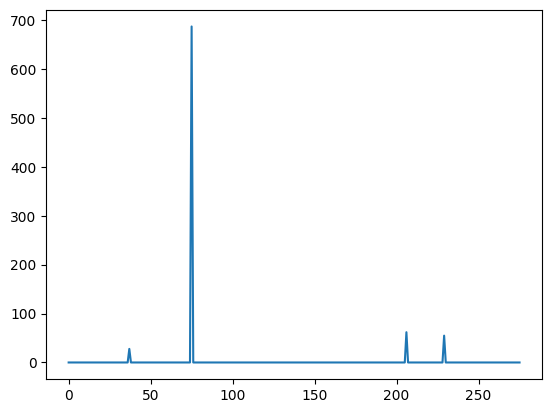

In [50]:
print(find_peaks(np.diff(obs_jd), height=1))
plt.plot(np.diff(obs_jd))

In [15]:
# t_start = Time(np.array(obs.headers.get_all('BJD')[0], dtype='float'), format='jd').jd.squeeze() * u.d

In [27]:
from astropy.stats import sigma_clip
from scipy.signal import find_peaks

In [51]:
def find_sequence_gaps(time_stamps, n_iter=10):
    """Automatically find the index of new sequence.
    This is done by finding the delta t jumps"""

    idx_steps, _ = find_peaks(np.diff(time_stamps), height=1)
    
    return np.array(idx_steps)

In [65]:
def split_gaps(time_stamps):
    
    if np.any(np.diff(time_stamps) < 0): # if not sorted according to Julian Date
        raise ValueError('`time_stamps` must be sorted.')

    idx_steps = find_sequence_gaps(time_stamps)
    idx_start = [None] + list(idx_steps + 1)
    idx_end = list(idx_steps + 1) + [None]
    indices = np.arange(len(time_stamps))
    
    print(idx_steps, idx_start, idx_end, indices)

    transit_tags = []
    for i_start, i_end in zip(idx_start, idx_end):
        slice_sequence = slice(i_start, i_end)
        print('\nslice sequance = ', slice_sequence)
        
        tr_tag = indices[slice_sequence]
        print('transit tag = ', tr_tag)
        
        if tr_tag.any():
            transit_tags.append(indices[slice_sequence])
        
    return transit_tags

In [66]:
transit_tags = split_gaps(obs_jd)

[ 37  75 206 229] [None, 38, 76, 207, 230] [38, 76, 207, 230, None] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229

In [57]:
%matplotlib notebook

Number of tags =  5


<IPython.core.display.Javascript object>


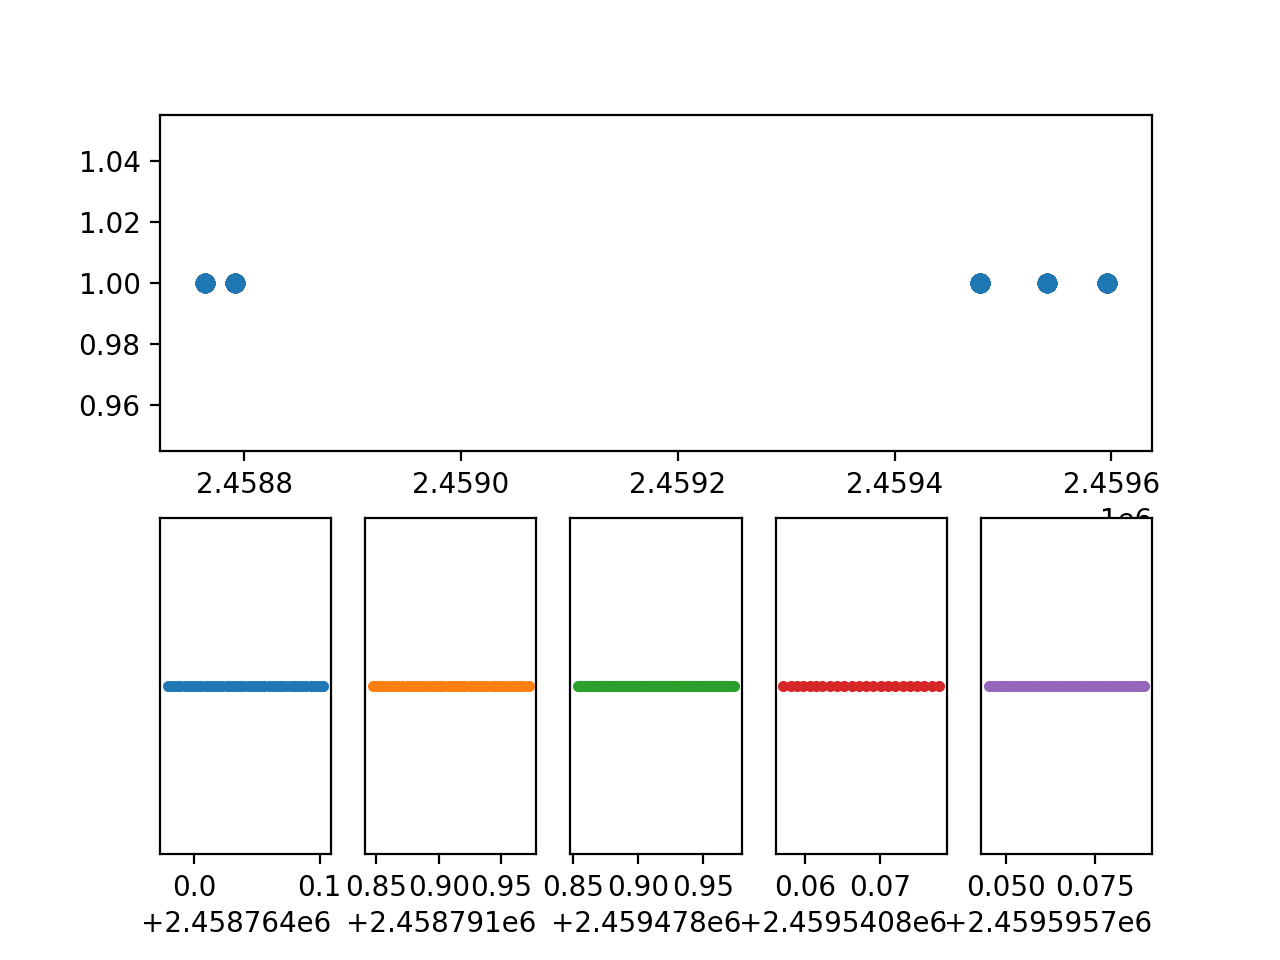

/tmp/ipykernel_693730/299349963.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax_tag = plt.subplot2grid((2, n_tags), (1, idx_tag))


In [77]:
n_tags = len(transit_tags)
print('Number of tags = ', n_tags)

fig = plt.figure()
ax_all = plt.subplot2grid((2, 1), (0, 0))
# ax_all = plt.subplot(2, 4, (1, 1))
# ax_all = plt.subplot(2, 1, (1, 1))
ax_all.plot(obs_jd, np.ones_like(obs_jd), 'o') 

ax_all = plt.subplot2grid((2, 4), (1, 0))

for idx_tag, tr_tag in enumerate(transit_tags):
    ax_tag = plt.subplot2grid((2, n_tags), (1, idx_tag))
    ax_all.plot(obs_jd[tr_tag], np.ones_like(obs_jd[tr_tag]), '.')
    color = ax_all.get_lines()[-1].get_color()
    ax_tag.plot(obs_jd[tr_tag], np.ones_like(obs_jd[tr_tag]), '.', color=color)
    ax_tag.set_yticks([])

In [23]:
for tr_tag in transit_tags:
    hdu = fits.open(obs_dir / filenames[tr_tag[0]])
    print(filenames[tr_tag[0]], hdu[0].header['PI_NAME'], hdu[0].header['DATE'])
    test = Time(hdu[0].header['DATE'])

2446828o_pp_e2dsff_AB.fits Antoine Darveau-Bernier 2019-10-07T11:24:06
2454981o_pp_e2dsff_AB.fits Antoine Darveau-Bernier 2019-11-04T08:13:37
2637647o_pp_e2dsff_AB.fits Louis-Philippe Coulombe 2021-09-21T08:23:55
2689365o_pp_e2dsff_AB.fits Louis-Philippe Coulombe 2021-11-22T08:26:16
2697068o_pp_e2dsff_AB.fits Louis-Philippe Coulombe 2022-01-16T05:49:27


## Create lists of files to be read

In [24]:
for idx_tr, tr_tag in enumerate(transit_tags):
    filenames_tr = filenames[tr_tag]
    hdu = fits.open(obs_dir / filenames_tr[0])
    date = Time(hdu[0].header['DATE'])
    date = date.datetime.date()
    name_list_files = Path(f'list_e2ds_visit_{date}')
    print(f'Writing to {name_list_files}')
    with open(obs_dir / name_list_files, 'w') as f:
        output = '\n'.join(filenames_tr)
        f.write(output + '\n')
    
    file_lists = {key: [] for key in FILE_FRAMES}
    for tr_file in filenames_tr:
        hdu = fits.open(obs_dir / tr_file)
        obs_id = hdu[0].header['filename']
        for reduction_type, f_format in FILE_FRAMES.items():
            other_file = f_format.format(obs_id)
            file_lists[reduction_type].append(other_file)
            
    for reduc_type, reduc_flist in file_lists.items():
        name_list_files = Path(f'list_{reduc_type}_visit_{date}')
        print(f'Writing to {name_list_files}')
        with open(obs_dir / name_list_files, 'w') as f:
            output = '\n'.join(reduc_flist)
            f.write(output + '\n')

Writing to list_e2ds_visit_2019-10-07


PermissionError: [Errno 13] Permission denied: '/home/ldang05/projects/def-dlafre/adb/Observations/SPIRou/v07275/WASP33/list_e2ds_visit_2019-10-07'